In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sys
sys.path.append("Fall 2024")


import kmax as kx
import utility as util
from hierarchy import *
import z_solver as zs





#  the distribution of the path segments lengths on a tree


In [1]:
# Define
lam = 1
offspring_dist = lambda: np.random.poisson(lam)
edge_dist = lambda: np.random.uniform(0, 1)

segment_lengths = []
num_samples = 100000



In [3]:
for _ in range(num_samples):
    # Generate GWBP tree
    tree = nx.Graph(GWBP(dist=offspring_dist, MAXLEVEL=10))
    for u, v in tree.edges():
        tree[u][v]['weight'] = edge_dist()

    if tree.number_of_nodes() == 1:
        continue

    # Get path segments
    path_set, _, _, _, _ = util.path_cover(tree)

    # get segment lengths - added a check to make sure edges have weights??
    segment_lengths += [tree[u][v]['weight'] for u, v in path_set if 'weight' in tree[u][v]]


print(f"Total segments extracted: {len(segment_lengths)}")



Total segments extracted: 663486


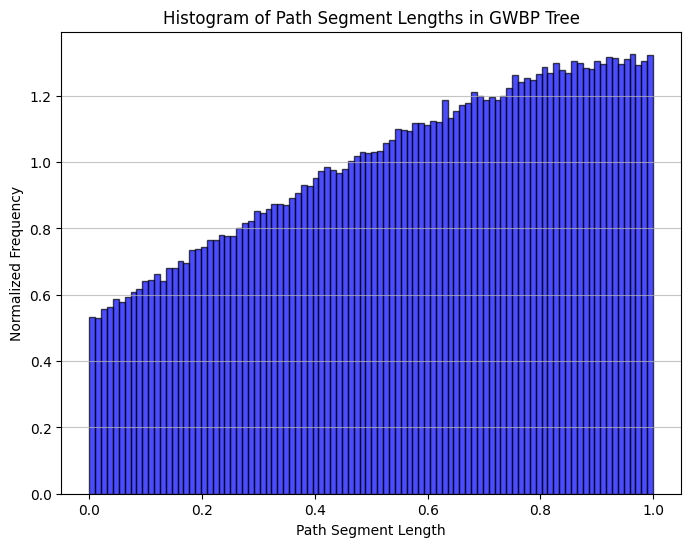

In [4]:
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(segment_lengths, bins="auto", color="blue", edgecolor="black", alpha=0.7, density=True)
plt.xlabel("Path Segment Length")
plt.ylabel("Normalized Frequency")
plt.title("Histogram of Path Segment Lengths in GWBP Tree")
plt.grid(axis='y', alpha=0.75)
plt.show()